**Table of contents**<a id='toc0_'></a>    
- [Research And Goal:](#toc1_1_1_)    
      - [Data Source](#toc1_1_1_1_)    
    - [Import data](#toc1_1_2_)    
    - [Spliting data](#toc1_1_3_)    
    - [Logistic Regression](#toc1_1_4_)    
    - [Decision Tree](#toc1_1_5_)    
    - [Random Forest Classifier](#toc1_1_6_)    
    - [Support Vector Machine](#toc1_1_7_)    
    - [Conclusion](#toc1_1_8_)    
    - [Confusion Matrix](#toc1_1_9_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_1_'></a>[Research And Goal:](#toc0_)

Understanding the value of the United States Dollar (USD) and its fluctuations is of paramount importance in today's interconnected global economy. The USD's strength or weakness can significantly impact international trade, investments, and overall economic stability. Economic analysts and researchers often employ a range of economic indicators to study and predict the movements of the USD price index, shedding light on the broader economic landscape.

#### <a id='toc1_1_1_1_'></a>[Data Source](#toc0_)

Data Source For Features: <a href ="https://fred.stlouisfed.org">Federal Reserve Bank of St. Louis, One Federal Reserve Bank Plaza, St. Louis</a></br>
Data Source for USD Index: <a href ="https://finance.yahoo.com/quote/DX-Y.NYB/history?period1=31795200&period2=1691884800&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true">Yahoo Finance</a>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



### <a id='toc1_1_2_'></a>[Import data](#toc0_)

In [30]:
data = pd.read_csv("./data.csv")

data  = data.drop('DATE', axis=1)

### <a id='toc1_1_3_'></a>[Spliting data](#toc0_)

In [31]:
X = data.drop('Label', axis=1) 
y = data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Store the accuracy scores and model names in lists
accuracy_scores = []
model_names = []

### <a id='toc1_1_4_'></a>[Logistic Regression](#toc0_)

In [33]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [34]:
logreg = LogisticRegression()
logreg.fit(X_train_std, y_train)
y_pred_logreg = logreg.predict(X_test_std)


In [35]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix_logreg = confusion_matrix(y_test, y_pred)

accuracy_scores.append(accuracy_score(y_test, y_pred_logreg))
model_names.append("Logistic Regression")


### <a id='toc1_1_5_'></a>[Decision Tree](#toc0_)

In [36]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Create and train the Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_std, y_train)
y_pred_dt = decision_tree.predict(X_test_std)

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
accuracy_scores.append(accuracy_score(y_test, y_pred_dt))
model_names.append("Decision Tree")


### <a id='toc1_1_6_'></a>[Random Forest Classifier](#toc0_)

In [37]:

# Create and train the Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train_std, y_train)
y_pred_rf = random_forest.predict(X_test_std)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_scores.append(accuracy_score(y_test, y_pred_rf))
model_names.append("Random Forest")

### <a id='toc1_1_7_'></a>[Support Vector Machine](#toc0_)

In [38]:
# Create and train the Support Vector Machine (SVM) model
svm = SVC()
svm.fit(X_train_std, y_train)
y_pred_svm = svm.predict(X_test_std)

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
accuracy_scores.append(accuracy_score(y_test, y_pred_svm))
model_names.append("Support Vector Machine")
# Evaluate models


### <a id='toc1_1_8_'></a>[Conclusion](#toc0_)

Logistic Regression Accuracy: 0.967741935483871
Logistic Regression Confusion Matrix:
 [[50  3]
 [ 0 40]]
Decision Tree Accuracy: 1.0
Decision Tree Confusion Matrix:
 [[53  0]
 [ 0 40]]
Random Forest Accuracy: 1.0
Random Forest Confusion Matrix:
 [[53  0]
 [ 0 40]]
Support Vector Machine Accuracy: 0.9354838709677419
Support Vector Machine Confusion Matrix:
 [[48  5]
 [ 1 39]]


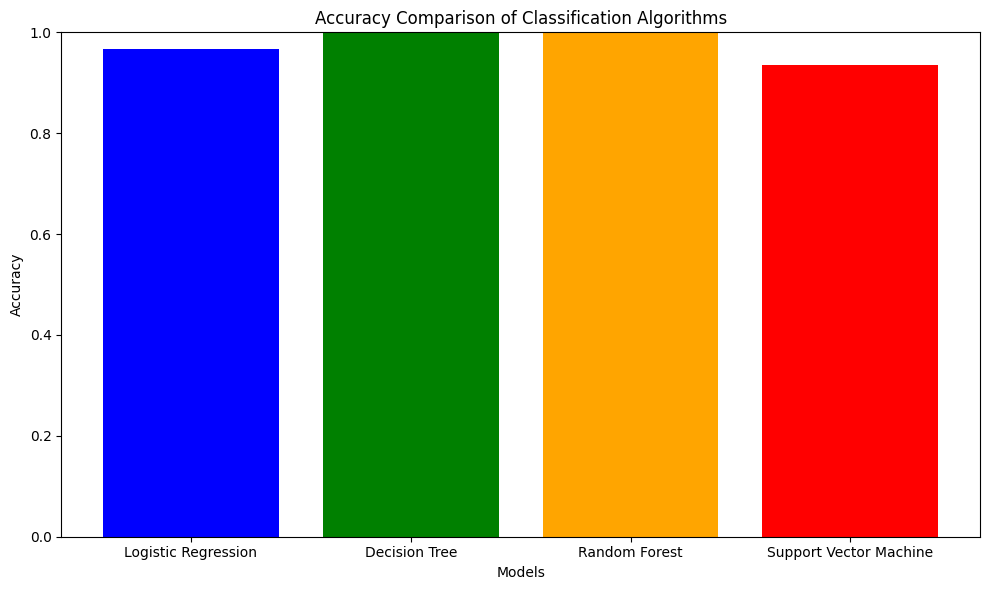

In [39]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    print(f"{model_name} Accuracy:", accuracy)
    print(f"{model_name} Confusion Matrix:\n", conf_matrix)

evaluate_model(y_test, y_pred_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svm, "Support Vector Machine")

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Classification Algorithms")
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.tight_layout()

# Show the plot
plt.show()

### <a id='toc1_1_9_'></a>[Confusion Matrix](#toc0_)

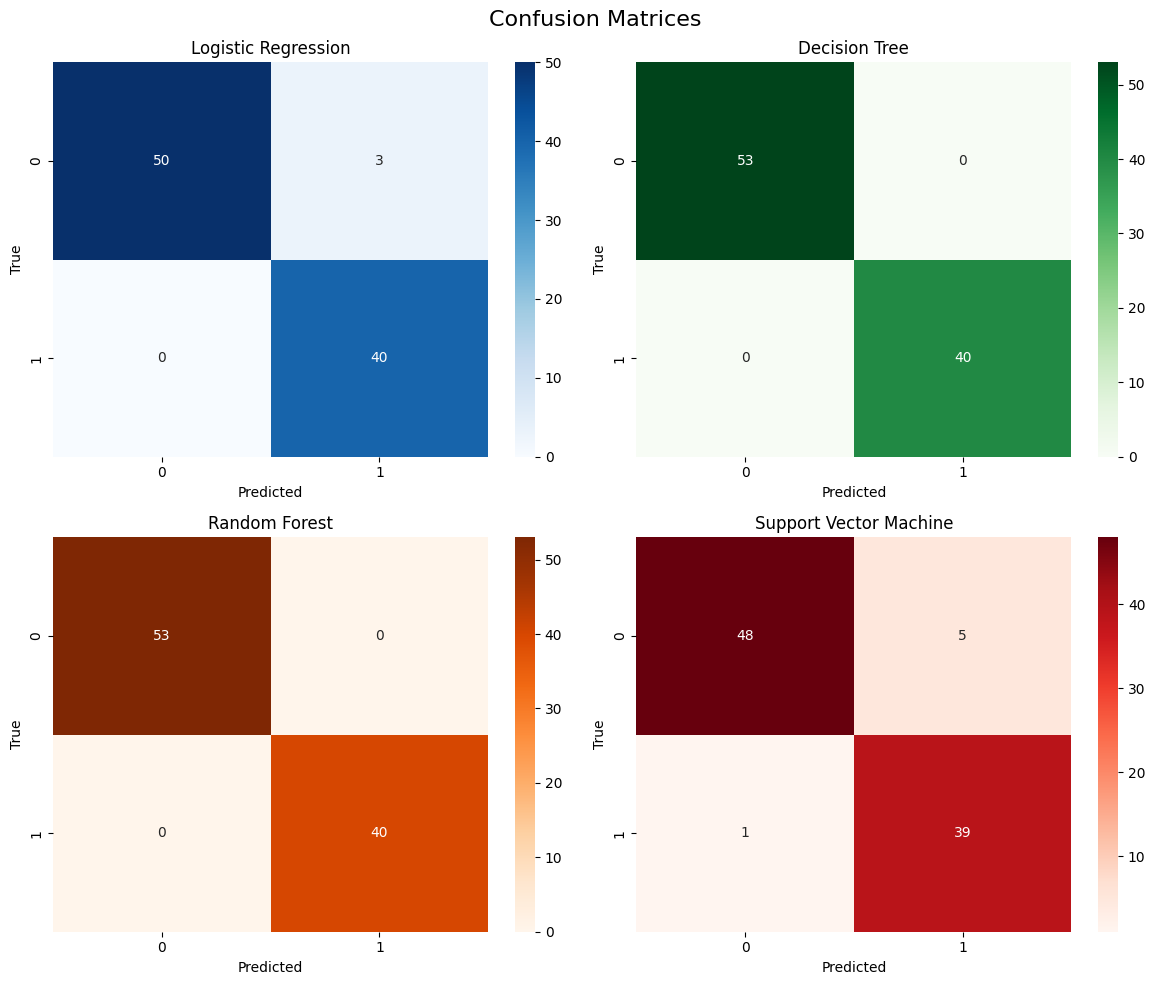

In [40]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Confusion Matrices", fontsize=16)

# Plot Confusion Matrix for Logistic Regression
sns.heatmap(conf_matrix_logreg, annot=True, fmt="d", cmap="Blues", ax=axes[0, 0])
axes[0, 0].set_title("Logistic Regression")
axes[0, 0].set_xlabel("Predicted")
axes[0, 0].set_ylabel("True")

# Plot Confusion Matrix for Decision Tree
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Greens", ax=axes[0, 1])
axes[0, 1].set_title("Decision Tree")
axes[0, 1].set_xlabel("Predicted")
axes[0, 1].set_ylabel("True")

# Plot Confusion Matrix for Random Forest
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Oranges", ax=axes[1, 0])
axes[1, 0].set_title("Random Forest")
axes[1, 0].set_xlabel("Predicted")
axes[1, 0].set_ylabel("True")

# Plot Confusion Matrix for Support Vector Machine
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Reds", ax=axes[1, 1])
axes[1, 1].set_title("Support Vector Machine")
axes[1, 1].set_xlabel("Predicted")
axes[1, 1].set_ylabel("True")

plt.tight_layout()
plt.show()